In [4]:
%cd /content/drive/MyDrive/DeepLearning/2. Linear Regression
!ls

/content/drive/.shortcut-targets-by-id/1V-PnSf9ldaQeIZdeOMR8t-u8IrHXzsgI/DeepLearning/2. Linear Regression
 data_linear.csv   LinearRegression.ipynb
 data_square.csv  'Linear regression.pdf'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install numpy

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('data_linear.csv')
data.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


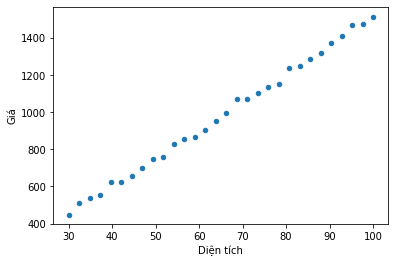

In [9]:
data.plot.scatter(x='Diện tích', y='Giá')

In [15]:
a = np.array([1, 2, 3, 4, 5, 6])
print(a.shape)

a = a.reshape(2, -1)
print(a)

(6,)
[[1 2 3]
 [4 5 6]]


Text(0, 0.5, 'giá')

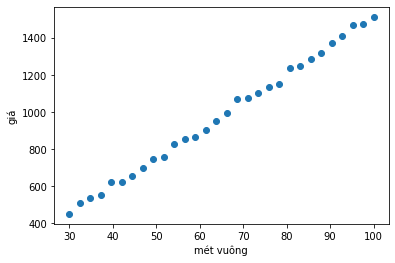

In [39]:
data = pd.read_csv('data_linear.csv').values
# print(data)
N = data.shape[0] # kích thước bộ dữ liệu
x = data[:, 0].reshape(-1, 1) # lấy input/feature
y = data[:, 1].reshape(-1, 1) # lấy output/label

# Vẽ đồ thị dữ liệu
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')


In [22]:
data.shape

(30, 2)

In [40]:
np.ones((N, 1)) # 30 hàng, 1 cột

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [41]:
# print(x)
x = np.hstack((np.ones((N, 1)), x)) # tạo ma trận x như trong bài
# print(x)

w = np.array([0.,1.]).reshape(-1,1)
# print(w)

x.shape

(30, 2)

In [42]:
# Gradient descent
# Bước traning: Dữ liệu traing được load từ file và lưu vào vector x, y
# Mục đích, tìm w sao cho cost function là nhỏ nhất

numOfIteration = 100 # số lần lặp tối đa
cost = np.zeros((numOfIteration,1)) # vector chi phi của mỗi lần lặp
learning_rate = 0.000001
for i in range(0, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    # correct the shape dimension
    w = w - learning_rate * np.dot(x.T, r)
    print('step {}, cost: {}'.format(i, cost[i]))

step 0, cost: [13929872.64455245]
step 1, cost: [10306582.37422079]
step 2, cost: [7625999.18237673]
step 3, cost: [5642849.69326854]
step 4, cost: [4175675.71851866]
step 5, cost: [3090230.83195734]
step 6, cost: [2287196.82094014]
step 7, cost: [1693096.06938209]
step 8, cost: [1253568.35550934]
step 9, cost: [928396.89128833]
step 10, cost: [687828.48611463]
step 11, cost: [509851.12972016]
step 12, cost: [378179.89312088]
step 13, cost: [280766.8575313]
step 14, cost: [208698.72973386]
step 15, cost: [155381.27570385]
step 16, cost: [115935.94816237]
step 17, cost: [86753.4994753]
step 18, cost: [65163.7354763]
step 19, cost: [49191.19268689]
step 20, cost: [37374.38339803]
step 21, cost: [28632.06953731]
step 22, cost: [22164.32937972]
step 23, cost: [17379.36470576]
step 24, cost: [13839.35126131]
step 25, cost: [11220.37783611]
step 26, cost: [9282.80838638]
step 27, cost: [7849.35533562]
step 28, cost: [6788.85776037]
step 29, cost: [6004.28016513]
step 30, cost: [5423.83373397

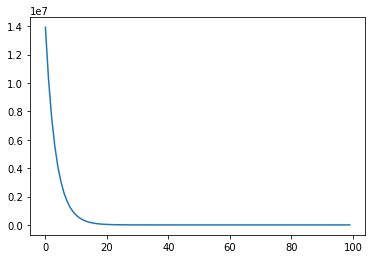

In [43]:
plt.plot(cost)
# Nhìn đồ thị thấy đâu đó khoảng 20 epoch là dừng lại được rồi

In [44]:
w # là w được cập nhật sau 100 bước lặp

array([[ 0.19471286],
       [15.10986529]])

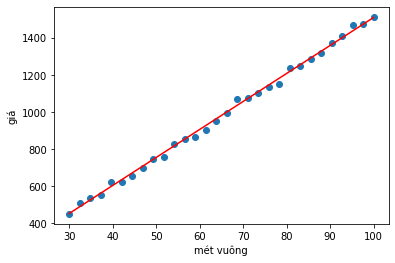

In [45]:
# Đã có w -> có hàm dự đoán
predict = np.dot(x, w) # Hàm dự đoán
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.show()

In [46]:
# Đã có w tức đã có model
# Predict
x1 = 50
y1 = w[0] + w[1] * 50
print('Giá nhà cho 50m^2 là : ', y1)

Giá nhà cho 50m^2 là :  [755.68797748]


Text(0, 0.5, 'giá')

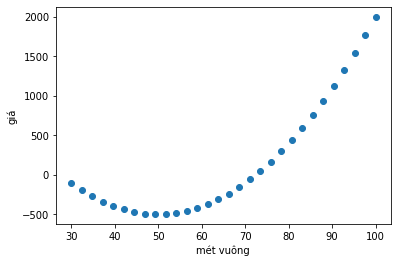

In [47]:
data = pd.read_csv('data_square.csv').values
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression().fit(x, y)

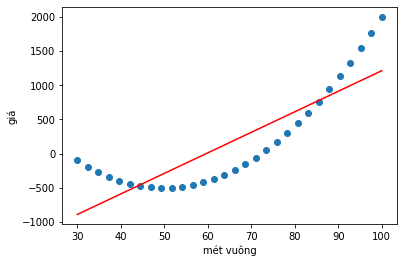

In [50]:
predict = reg.predict(x)
plt.plot((x[0][0], x[N-1][0]),(predict[0], predict[N-1]), 'r')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.show()

In [51]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
x = np.stack([x, np.square(x)], axis=-1)
x = x.reshape(x.shape[0], x.shape[-1])
print(x.shape)
x

(30, 2)


array([[   30.        ,   900.        ],
       [   32.4138    ,  1050.65443044],
       [   34.8276    ,  1212.96172176],
       [   37.2414    ,  1386.92187396],
       [   39.6552    ,  1572.53488704],
       [   42.069     ,  1769.800761  ],
       [   44.4828    ,  1978.71949584],
       [   46.8966    ,  2199.29109156],
       [   49.3103    ,  2431.50568609],
       [   51.7241    ,  2675.38252081],
       [   54.1379    ,  2930.91221641],
       [   56.5517    ,  3198.09477289],
       [   58.9655    ,  3476.93019025],
       [   61.3793    ,  3767.41846849],
       [   63.7931    ,  4069.55960761],
       [   66.2069    ,  4383.35360761],
       [   68.6207    ,  4708.80046849],
       [   71.0345    ,  5045.90019025],
       [   73.4483    ,  5394.65277289],
       [   75.8621    ,  5755.05821641],
       [   78.2759    ,  6127.11652081],
       [   80.6897    ,  6510.82768609],
       [   83.1034    ,  6906.17509156],
       [   85.5172    ,  7313.19149584],
       [   87.93

In [52]:
reg = LinearRegression().fit(x, y)

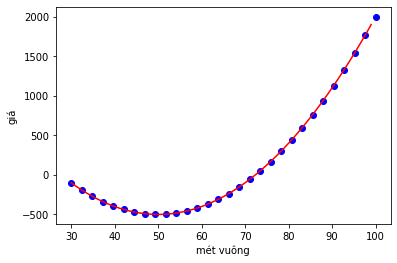

In [56]:
a = []
b = []
for i in range(30,100,1):
    j = reg.coef_[0][0] * i + reg.coef_[0][1] * i * i + reg.intercept_
    a.append(i)
    b.append(j)

plt.plot(a, b, c='r')

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y, c='b')

plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.show()

In [57]:
print (reg.coef_)

[[-100.00022214    1.00000199]]


In [58]:
reg.intercept_

array([2000.00579425])